# PoDS 22/23 w4 Mini-Project Insomnia Dataset

## Importing and Setting Up Packages and Environment

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', font_scale=0.8)

## A Brief Description of the Case Study and Data

* Study involves the [dataset](https://raw.githubusercontent.com/datacamp/Hacker-Stats-in-Python-Live-Training/master/data/gfmt_sleep.csv) and described in the paper [Perceptual impairment in face identification with poor sleep](https://royalsocietypublishing.org/doi/10.1098/rsos.160321).

* Developed to investigate how sleep deprivation could affect someone's ability to match faces. 

* Why? Think of shift-based security work.

* Methodology
    - each subject looks at 40 pairs of faces and has to say whether they are the same person (**hit**) or not (**reject**). For each pair, a subject also provides their **confidence** (0-100%) in their judgement.

    - a subject also takes surveys to determine properties of their sleep; each survey captures a different aspect and metric of sleep quality and wakefulness:
        
        + The **Sleep Condition Indicator (SCI)** "is a measure of insomnia disorder over the past month. High scores indicate better sleep and scores of 16 and below indicate insomnia."
        + The **Pittsburgh Sleep Quality Index (PSQI)** "quantifies how well a subject sleeps in terms of interruptions, latency, and so on. A higher score indicates poorer sleep."
        + The **Epworth Sleepiness Scale (ESS)** "assesses daytime drowsiness. Higher scores indicate greater drowsiness."
        
    - "...Insomnia was identified if participants scored **below threshold** on the Sleep Condition Indicator... overall scores of **16** or below are diagnostic of insomnia disorder..."

In [3]:
gfmt = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/gfmt_sleep.csv')

In [4]:
gfmt.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50,75.0,50,4,11,7
2,18,f,31,90,95,92.5,89.5,90,86.0,81,89.0,88,10,9,3
3,22,f,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20
4,27,f,74,60,65,62.5,68.5,49,61.0,49,65.0,49,13,9,12


## Data Inspection, Cleaning, Pre-Processing

There is a participant number that looks like an ID feature, so I'll try to make that the row index.

In [5]:
gfmt = gfmt.set_index('participant number')

I am not interested in gender/biological sex, so I'll leave this out from the subsequent analysis.

In [6]:
gfmt = gfmt.drop(columns=['gender'])

I don't like that `*` that I see in `confidence when incorrect hit`. My guess is that it might have been used to indicate a missing/unknown value for a subject. That would have been seen as a string value and, as such, make the column not numeric, which is not ideal going forward. I will double check:

In [7]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               102 non-null    int64  
 1   correct hit percentage            102 non-null    int64  
 2   correct reject percentage         102 non-null    int64  
 3   percent correct                   102 non-null    float64
 4   confidence when correct hit       102 non-null    float64
 5   confidence when incorrect hit     102 non-null    object 
 6   confidence when correct reject    102 non-null    float64
 7   confidence when incorrect reject  102 non-null    object 
 8   confidence when correct           102 non-null    float64
 9   confidence when incorrect         102 non-null    object 
 10  sci                               102 non-null    int64  
 11  psqi                              102 non-null    int64  
 12  ess     

I see `object` associated with `confidence when incorrect hit`, `confidence when incorrect reject`, and `confidence when incorrect`. I am guessing that the missing value convention is the cause.

In [8]:
gfmt.loc[ gfmt['confidence when incorrect hit'].str.contains('\*') ].head()

,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
participant number,,,,,,,,,,,,,
22,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20
35,53,100,50,75.0,74.5,*,60.5,65,71.0,65,14,8,7
76,61,100,40,70.0,69.5,*,44.5,73,54.5,73,16,4,12
78,31,100,70,85.0,92.0,*,81.0,60,87.5,60,14,6,11
80,28,100,50,75.0,100.0,*,100.0,100,100.0,100,12,7,12


Notice the use of `str.contains` to test whether the feature contains a substring - the `\` is used to escape `*`, as the latter is a special character in searches involving regular expressions.

In [9]:
gfmt.loc[ gfmt['confidence when incorrect reject'].str.contains('\*') ].head()

,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
participant number,,,,,,,,,,,,,
34,33,80,100,90.0,70.5,76.5,64.5,*,68.0,76.5,14,12,10
41,36,90,100,95.0,76.5,75.5,75.0,*,76.0,75.5,15,7,0
71,40,40,100,70.0,69.0,56,70.0,*,70.0,56,0,11,14
5,18,90,100,95.0,76.5,83,80.0,*,80.0,83,21,7,5
10,25,100,100,100.0,90.0,*,85.0,*,90.0,*,17,10,11


To fix the `*`, I'll try a very simple approach:

* I'll replace all of them by `np.nan`, which is the special placeholder for unknown/missing values in the Python DS ecosystem.
* And I'll then replace all missing values by the mean of the column of interest.
* Force the numeric columns to be interpreted by `pandas` as so.

In [10]:
cols_with_missing_values = [
    'confidence when incorrect hit', 'confidence when incorrect reject', 
    'confidence when correct', 'confidence when incorrect'
]

In [11]:
# this also illustrates how one can overwrite a slice of a DataFrame with newly computed slice
gfmt.loc[:, cols_with_missing_values] = gfmt.loc[:, cols_with_missing_values].replace('*', np.nan)

In [12]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               102 non-null    int64  
 1   correct hit percentage            102 non-null    int64  
 2   correct reject percentage         102 non-null    int64  
 3   percent correct                   102 non-null    float64
 4   confidence when correct hit       102 non-null    float64
 5   confidence when incorrect hit     84 non-null     object 
 6   confidence when correct reject    102 non-null    float64
 7   confidence when incorrect reject  93 non-null     object 
 8   confidence when correct           102 non-null    float64
 9   confidence when incorrect         99 non-null     object 
 10  sci                               102 non-null    int64  
 11  psqi                              102 non-null    int64  
 12  ess     

In [13]:
# type casting the numeric columns as float
gfmt.loc[:, cols_with_missing_values] = gfmt.loc[:, cols_with_missing_values].astype(float)

/tmp/ipykernel_4292/502268722.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gfmt.loc[:, cols_with_missing_values] = gfmt.loc[:, cols_with_missing_values].astype(float)


In [14]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               102 non-null    int64  
 1   correct hit percentage            102 non-null    int64  
 2   correct reject percentage         102 non-null    int64  
 3   percent correct                   102 non-null    float64
 4   confidence when correct hit       102 non-null    float64
 5   confidence when incorrect hit     84 non-null     float64
 6   confidence when correct reject    102 non-null    float64
 7   confidence when incorrect reject  93 non-null     float64
 8   confidence when correct           102 non-null    float64
 9   confidence when incorrect         99 non-null     float64
 10  sci                               102 non-null    int64  
 11  psqi                              102 non-null    int64  
 12  ess     

In [15]:
gfmt.loc[:, cols_with_missing_values].mean()

confidence when incorrect hit       58.565476
confidence when incorrect reject    61.220430
confidence when correct             74.642157
confidence when incorrect           61.979798
dtype: float64

In [16]:
# finally, if needed for machine learning, I can do a simple value imputation
gfmt.loc[:, cols_with_missing_values] = (
    gfmt
    .loc[:, cols_with_missing_values]
    .fillna(gfmt.loc[:, cols_with_missing_values].mean())
)

In [17]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               102 non-null    int64  
 1   correct hit percentage            102 non-null    int64  
 2   correct reject percentage         102 non-null    int64  
 3   percent correct                   102 non-null    float64
 4   confidence when correct hit       102 non-null    float64
 5   confidence when incorrect hit     102 non-null    float64
 6   confidence when correct reject    102 non-null    float64
 7   confidence when incorrect reject  102 non-null    float64
 8   confidence when correct           102 non-null    float64
 9   confidence when incorrect         102 non-null    float64
 10  sci                               102 non-null    int64  
 11  psqi                              102 non-null    int64  
 12  ess     

**Note**: Of course one could do the cleaning above manually in a spreadsheet application or the like; but that defeats the purpose of having a scalable, reproducible, generic workflow for data processing. We would always to favour the latter.

I am not keen on writing very long names for columns when doing computation (rather than presentation) work. So I am renaming columns, making their labels shorter. There are different approaches to this (e.g., `.rename()`, `.columns=`) - I'll go with `.set_axis()`, as I am renaming most of the columns.

In [18]:
gfmt = gfmt.set_axis([
    'age', 'acc_hit', 'acc_rjct', 'acc', 
    'conf_acc_hit', 'conf_incorr_hit', 'conf_acc_rjct', 'conf_incorr_rjct',
    'conf_acc', 'conf_incorr', 'sci', 'psqi', 'ess'
], axis='columns')

In [19]:
gfmt.head(1)

,age,acc_hit,acc_rjct,acc,conf_acc_hit,conf_incorr_hit,conf_acc_rjct,conf_incorr_rjct,conf_acc,conf_incorr,sci,psqi,ess
participant number,,,,,,,,,,,,,
8,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2


In [20]:
gfmt.columns

Index(['age', 'acc_hit', 'acc_rjct', 'acc', 'conf_acc_hit', 'conf_incorr_hit',
       'conf_acc_rjct', 'conf_incorr_rjct', 'conf_acc', 'conf_incorr', 'sci',
       'psqi', 'ess'],
      dtype='object')

## Some Potential Questions to be Asked

Some extracts from the paper for consideration:
1. ...whether poor sleep affects accuracy on a standard test of face-matching ability...
2. ...participants who reported sleep disturbance consistent with insomnia disorder show impaired accuracy on the GFMT when compared with participants reporting normal sleep behaviour...
3. ...any difference in correct hits and rejects...?
4. ...reduced face-matching accuracy in those with poorer sleep was not associated with lower confidence...
5. One would expected `sci` (insomnia metric) to be associated with `ess` (daytime drowsiness)? But how about the euphoria...
6. Insomnia and quality of sleep?

### Sleep Quality and Day Drowsiness Metrics: Possible Association GFMT Accuracy?

We are looking here at `acc` against each of `sci`, `psqi`, `ess`. All quantitative features.

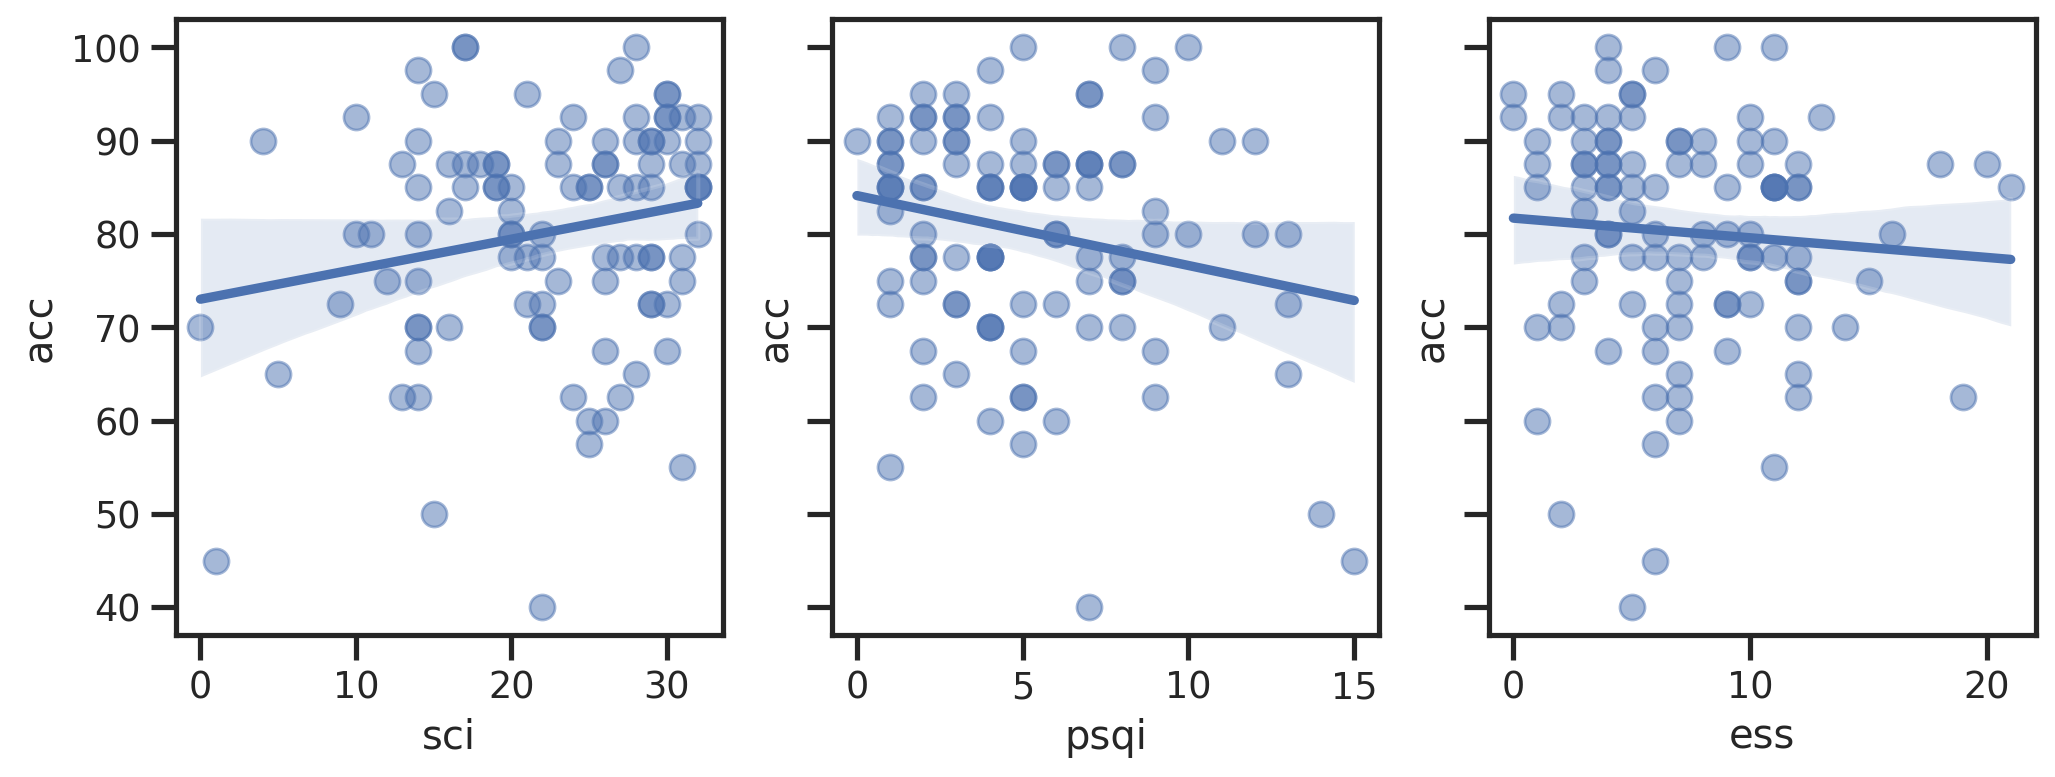

In [21]:
# regplot can show a scatter
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
sns.regplot(data=gfmt, x='sci', y='acc', ax=axs[0], scatter_kws={'alpha': 0.5})
sns.regplot(data=gfmt, x='psqi', y='acc', ax=axs[1], scatter_kws=dict(alpha=0.5))
sns.regplot(data=gfmt, x='ess', y='acc', ax=axs[2], scatter_kws=dict(alpha=0.5));

## Insomniac and Normal Sleepers

In [22]:
gfmt['sleeper_group'] = gfmt['sci']<=16

In [23]:
gfmt.head(1)

,age,acc_hit,acc_rjct,acc,conf_acc_hit,conf_incorr_hit,conf_acc_rjct,conf_incorr_rjct,conf_acc,conf_incorr,sci,psqi,ess,sleeper_group
participant number,,,,,,,,,,,,,,
8,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True


In [24]:
# let us change True/False by `insomniac` and `normal sleeper`
gfmt['sleeper_group'] = gfmt['sleeper_group'].map({ True: 'insomniac', False: 'normal sleeper' })

In [25]:
gfmt.head(1)

,age,acc_hit,acc_rjct,acc,conf_acc_hit,conf_incorr_hit,conf_acc_rjct,conf_incorr_rjct,conf_acc,conf_incorr,sci,psqi,ess,sleeper_group
participant number,,,,,,,,,,,,,,
8,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,insomniac


In [26]:
gfmt['sleeper_group'].value_counts()

normal sleeper    77
insomniac         25
Name: sleeper_group, dtype: int64

## Data Science Question: Are There Noticeable Differences in Performance Between Insomniac and Normal Sleepers?

`.stripplot()` can be quite useful to visualise a distribution (quantitive feature) conditioned on the value of a categorical feature. It shows all individual data points; one can control appearance by using parameters such as `jitter` and `alpha`.

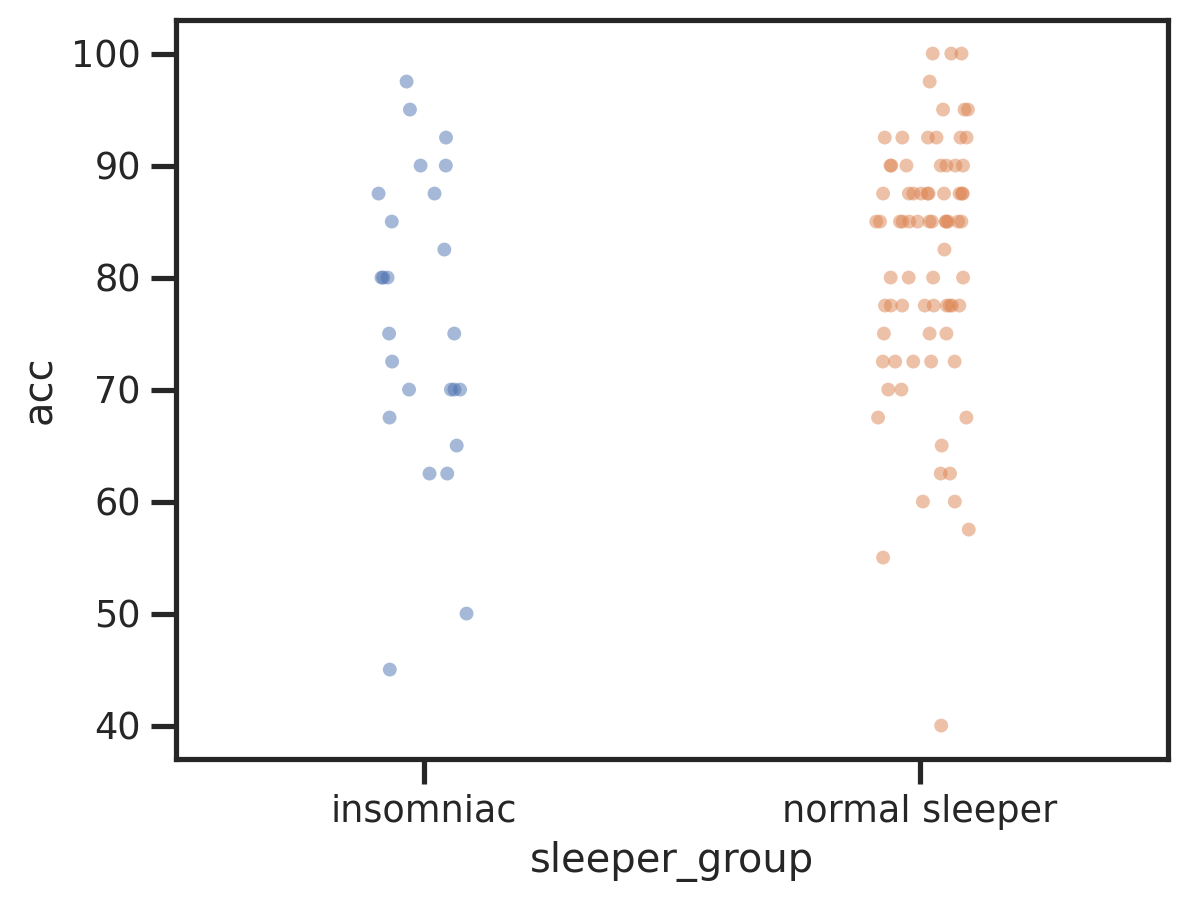

In [27]:
sns.stripplot(data=gfmt, x='sleeper_group', y='acc', alpha=0.5);

I am big fan of combining `.stripplot()` with `.boxplot()` (`showfliers=False` switches off showing outliers individually; we don't need it, as we are stacking both plots on the same plotting area).

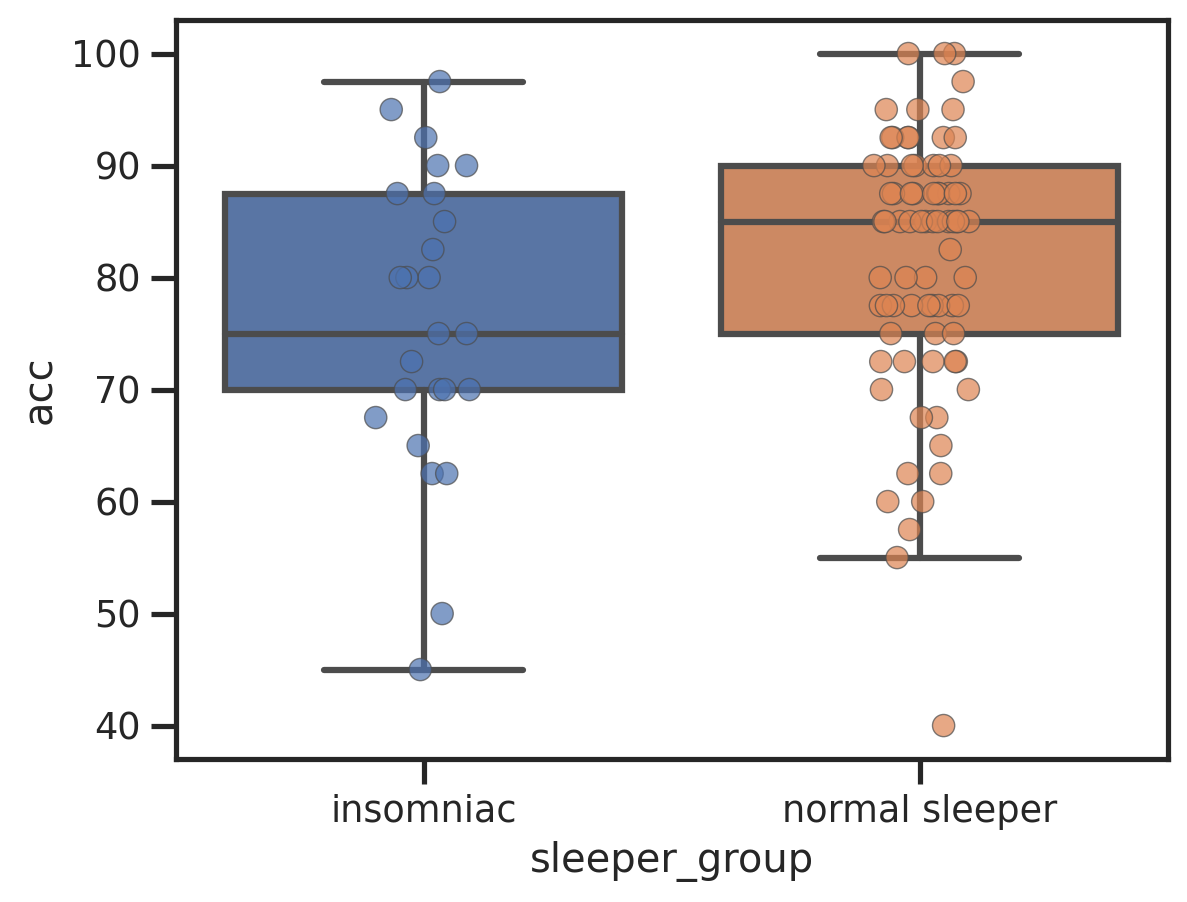

In [28]:
sns.boxplot(data=gfmt, x='sleeper_group', y='acc', showfliers=False)
sns.stripplot(data=gfmt, x='sleeper_group', y='acc', linewidth=0.5, jitter=0.1, size=8, alpha=0.7);

Reminding myself of the column names:

In [29]:
gfmt.columns

Index(['age', 'acc_hit', 'acc_rjct', 'acc', 'conf_acc_hit', 'conf_incorr_hit',
       'conf_acc_rjct', 'conf_incorr_rjct', 'conf_acc', 'conf_incorr', 'sci',
       'psqi', 'ess', 'sleeper_group'],
      dtype='object')

Firstly, the measures of correctness (hit and reject):

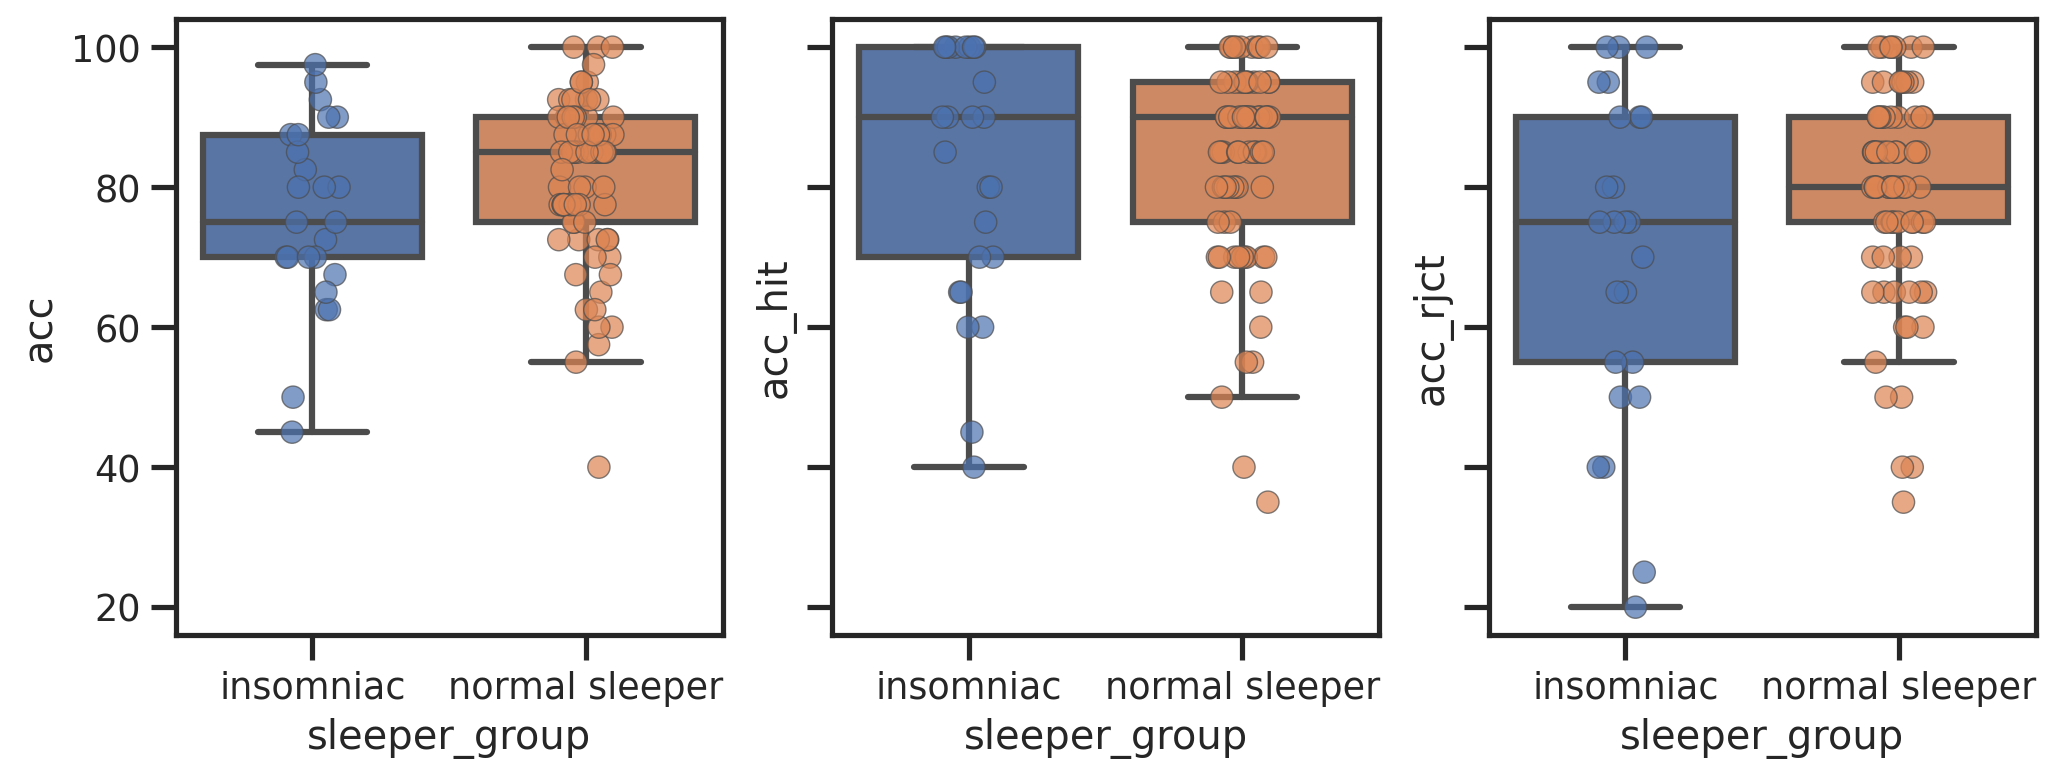

In [30]:
# I would like to put the plots side-by-side; you would have seen examples
# of subplots functionality provided my matplotlib
# axs is a numpy array of axes objects (each axes is a plotting area; canvas)
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)
sns.boxplot(data=gfmt, x='sleeper_group', y='acc', showfliers=False, ax=axs[0])
sns.stripplot(data=gfmt, x='sleeper_group', y='acc', ax=axs[0],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7)
sns.boxplot(data=gfmt, x='sleeper_group', y='acc_hit', showfliers=False, ax=axs[1])
sns.stripplot(data=gfmt, x='sleeper_group', y='acc_hit', ax=axs[1],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7)
sns.boxplot(data=gfmt, x='sleeper_group', y='acc_rjct', showfliers=False, ax=axs[2])
sns.stripplot(data=gfmt, x='sleeper_group', y='acc_rjct', ax=axs[2],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7);

# I copy-and-pasted the same set of statements twice; we always try to 
# create reusable, generic code, but this is fine for week 4

Your thoughts on the above? Any claims that we can make?

In [31]:
gfmt.columns

Index(['age', 'acc_hit', 'acc_rjct', 'acc', 'conf_acc_hit', 'conf_incorr_hit',
       'conf_acc_rjct', 'conf_incorr_rjct', 'conf_acc', 'conf_incorr', 'sci',
       'psqi', 'ess', 'sleeper_group'],
      dtype='object')

Secondly, the measures of confidence-in-performance:

<AxesSubplot:xlabel='sleeper_group', ylabel='conf_incorr_hit'>

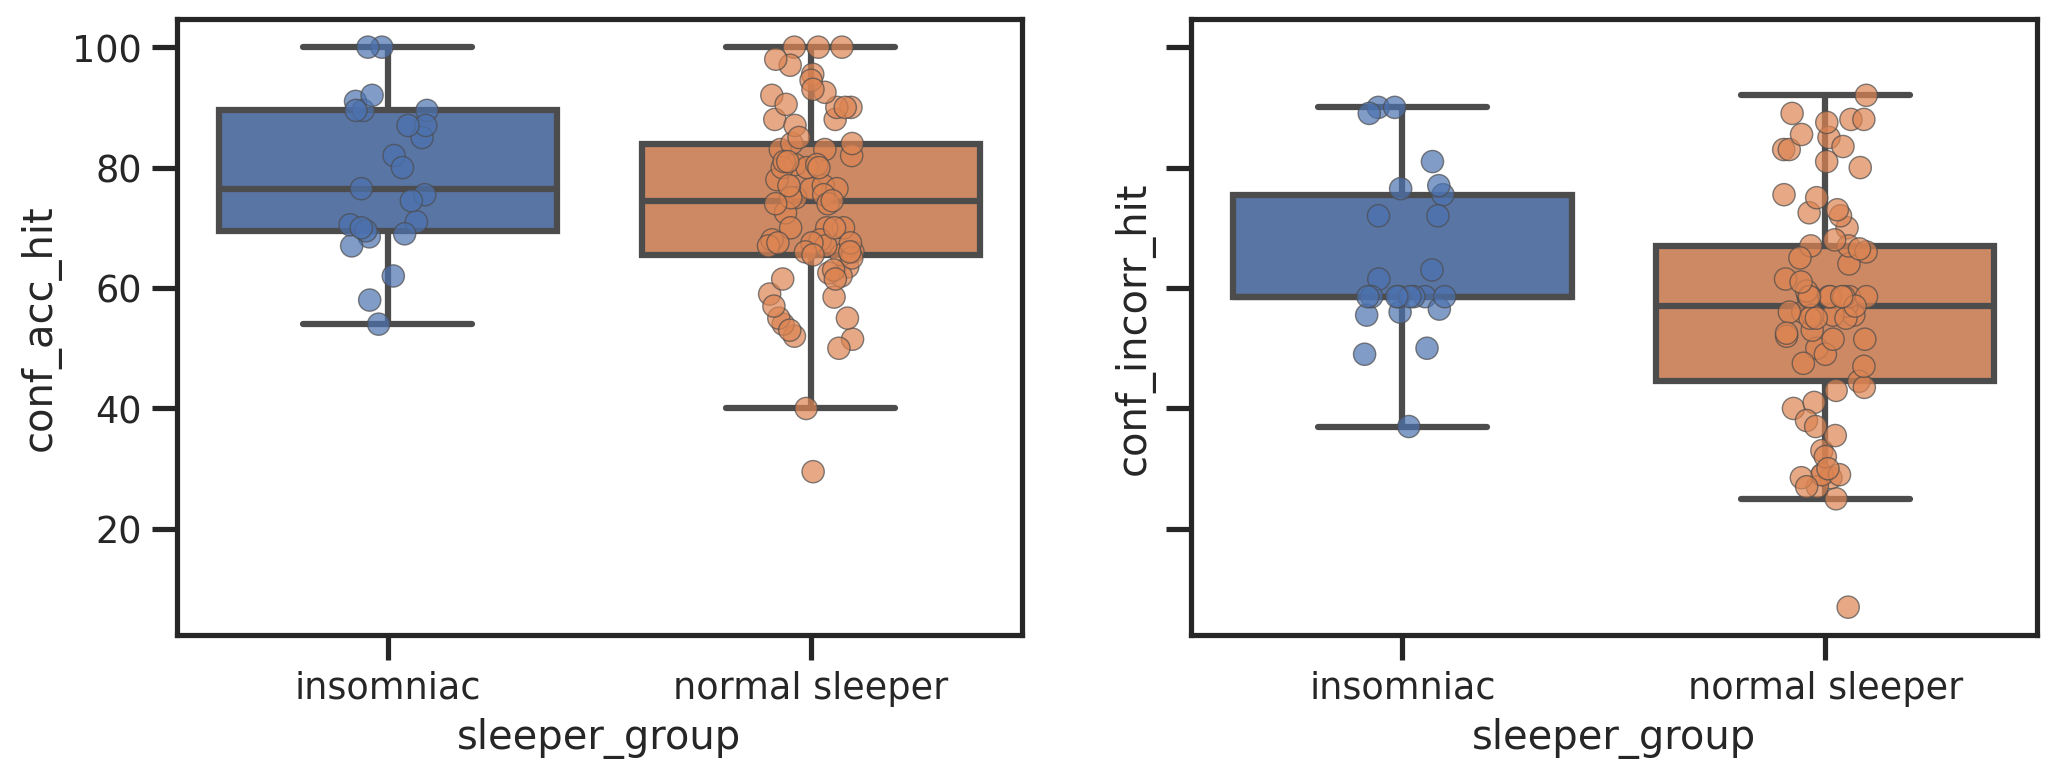

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)

sns.boxplot(data=gfmt, x='sleeper_group', y='conf_acc_hit', showfliers=False, ax=axs[0])
sns.stripplot(data=gfmt, x='sleeper_group', y='conf_acc_hit', ax=axs[0],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7)

sns.boxplot(data=gfmt, x='sleeper_group', y='conf_incorr_hit', showfliers=False, ax=axs[1])
sns.stripplot(data=gfmt, x='sleeper_group', y='conf_incorr_hit', ax=axs[1],
              linewidth=0.5, jitter=0.1, size=8, alpha=0.7)


Your thoughts on the above? Any claims that we can make?

## Exercises
    
* Could you extend the above for other confidence-in-performance metrics?

* Could you also investigate the following:
    - One would expected `sci` (insomnia metric) to be associated with `ess` (daytime drowsiness). Does this hold?
    - Is there a clear association between insomnia disorder and quality of sleep?